# MOVIE RATING PREDICTION

The Movie Rating Prediction project aims to predict the rating of a movie based on various features such as genre, director, actors, budget, and other relevant factors. By analyzing historical data on movies and their ratings, the goal is to develop a regression model that can estimate how a movie will be rated by users or critics. This project provides an opportunity to explore techniques in data analysis, feature engineering, and machine learning to understand the relationship between different movie characteristics and their ratings.

# Import Libraries

In [66]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [68]:
# Load the dataset
data = pd.read_csv('IMDb Movies India.csv',encoding = 'ISO-8859-1')
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


# Inspecting the dataset

In [70]:
# get the number of row and columns
data.shape

(15509, 10)

In [71]:
# show the basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [72]:
# show statistic summary
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


# Data Cleaning

In [74]:
# Handle missing values
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

<Axes: >

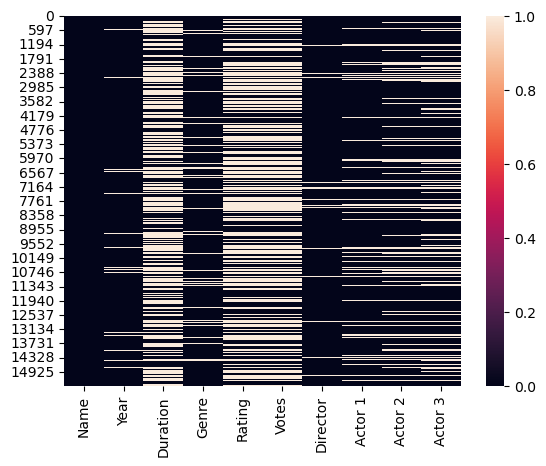

In [75]:
sns.heatmap(data.isnull())

In [76]:
from sklearn.impute import SimpleImputer

#convert column to numeric
data['Year'] = pd.to_numeric(data['Year'],errors = 'coerce')
data['Duration'] = pd.to_numeric(data['Duration'],errors = 'coerce')
data['Rating'] = pd.to_numeric(data['Rating'],errors = 'coerce')
data['Votes'] = pd.to_numeric(data['Votes'],errors='coerce')

In [77]:
# Handle columns with only missing values by filling with a constant (e.g., 0 or a specific value)
data['Year'] = data['Year'].fillna(0)  # or any other strategy
data['Duration'] = data['Duration'].fillna(0)  # or any other strategy

# Now impute other columns as usual
numerical_cols = ['Rating', 'Votes']  # excluding 'Year' and 'Duration' since they are handled separately

# Impute missing values for the other numerical columns
imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])

In [78]:
#'Genre', 'Director', and 'Actor 1' are categorical columns
categorical_cols = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

# Create the imputer object
imputer = SimpleImputer(strategy='most_frequent')

# Apply imputer to categorical columns
data[categorical_cols] = imputer.fit_transform(data[categorical_cols])

In [79]:
data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [80]:
# Check duplicates value
data.duplicated().sum()

10

In [81]:
# Drop duplicated values
data = data.drop_duplicates()

In [82]:
# Recheck duplicated values
data.duplicated().sum()

0

# Model Development

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Define the features (X) and target (y)
X = data.drop('Rating', axis=1)  # Features (exclude 'Rating')
y = data['Rating']  # Target variable ('Rating')

In [85]:
# Identify categorical and numerical features
categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
numerical_features = ['Year', 'Duration', 'Votes']

# Preprocessing for numerical and categorical features
# For numerical features: Impute missing values and scale them
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
    ('scaler', StandardScaler())  # Scale numerical features
])

# For categorical features: Impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

# Step 5: Combine both transformers into one ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 6: Create a Random Forest Regressor model within a pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),  # First apply preprocessing
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))  # Random Forest model
])

# Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared score

# Output
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.7350639948751893
R-squared: 0.2089376122021157


In [86]:
# Get feature importances
importances = model.named_steps['regressor'].feature_importances_

# Get feature names: Combine numerical features and categorical feature names from the OneHotEncoder
# First, we need to fit the OneHotEncoder to get the feature names after transformation
categorical_transformer_fitted = model.named_steps['preprocessor'].transformers_[1][1]
categorical_transformer_fitted.fit(X_train[categorical_features])

# Get feature names from the OneHotEncoder
onehot_feature_names = categorical_transformer_fitted.get_feature_names_out(categorical_features)

# Combine numerical and categorical feature names
feature_names = numerical_features + list(onehot_feature_names)

# Display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

# Predict the rating for a new movie
new_movie_data = pd.DataFrame({
     'Year': [2022],
    'Duration': [110],
    'Votes': [4000],
    'Genre': ['Action'],
    'Director': ['Christopher Nolan'],
    'Actor 1': ['Matthew McConaughey'],
    'Actor 2': ['Anne Hathaway'],
    'Actor 3': ['Jessica Chastain']
})

predicted_rating = model.predict(new_movie_data)
print(f"Predicted Rating for the new movie: {predicted_rating[0]:.2f}")

Feature Importances:
                     Feature    Importance
2                      Votes  7.567088e-02
280              Genre_Drama  2.316976e-02
249        Genre_Documentary  1.397953e-02
16288           Actor 3_Pran  1.264625e-02
381             Genre_Horror  8.552448e-03
...                      ...           ...
1258    Director_Bhagyashree -2.197225e-18
9115      Actor 1_Sudharshan -2.257503e-18
3939    Director_Rajula Shah -2.601077e-18
3470   Director_Piyush Pande -3.234649e-18
920        Director_Anuradha -3.940089e-18

[18003 rows x 2 columns]
Predicted Rating for the new movie: 6.09
